# Regression
 - 회귀문제의 역전파 구현

* 은닉층 활성화 함수 : 시그모이드 (0 < y < 1)
* 출력층 활성화 함수 : 항등 함수 
* 손실함수 : 오차 제곱합
* 최적화 알고리즘 : SGD(확률적 경사 하강법)   
  (전체 샘플 데이터를 사용하지 않고 무작위로 일부 샘플 데이터를 선택하여 수행)
* 배치 사이즈 : 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi  # -1.0 ~ 1.0
n_data = len(correct_data)

In [3]:
n_in = 1
n_mid = 5
n_out = 1

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200  # 200번 돌 때마다 확인하기 위해

In [5]:
class MiddleLayer:
    def __init__(self, n_upper, n):  # 이전층 노드 수, 내 노드수 바꾸기
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):  # 순전파
        self.x = x         # 우선 저장
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))  # 시그노이드 함수 사용
    
    def backward(self, grad_y):  # 역전파
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):   # 파라미터 갱신
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 사용

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):  # 이전층 노드 수, 내 노드수 바꾸기
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):  # 순전파
        self.x = x         # 우선 저장
        u = np.dot(x, self.w) + self.b
        self.y = u  # 항등함수 사용
    
    def backward(self, t):  # 역전파
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):   # 파라미터 갱신
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [9]:
# 객체 생성
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

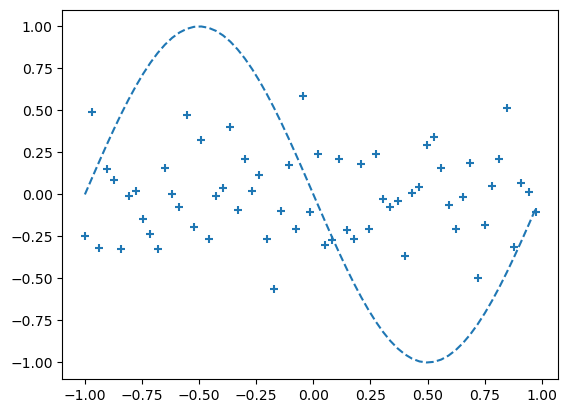

Epoch: 0/2001 Error: 0.28007896757209516


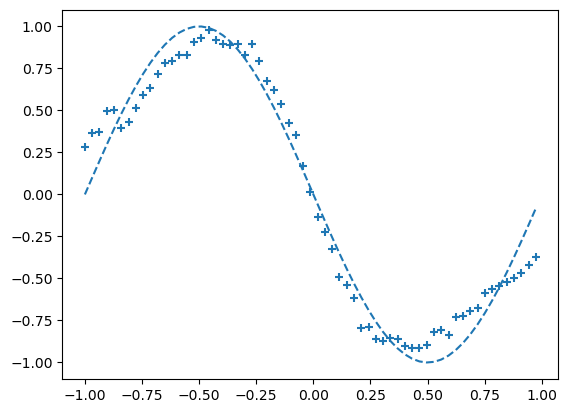

Epoch: 200/2001 Error: 0.00822105438941863


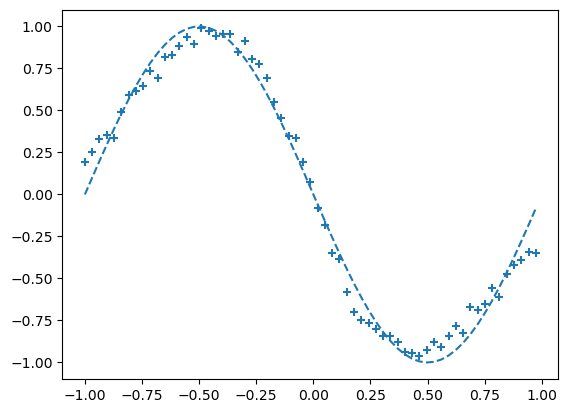

Epoch: 400/2001 Error: 0.0040814616992567


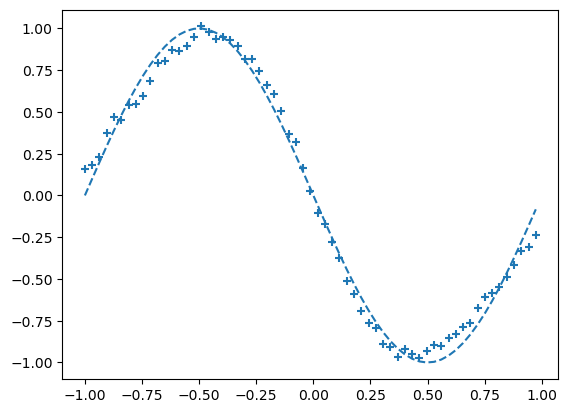

Epoch: 600/2001 Error: 0.0025059038264962064


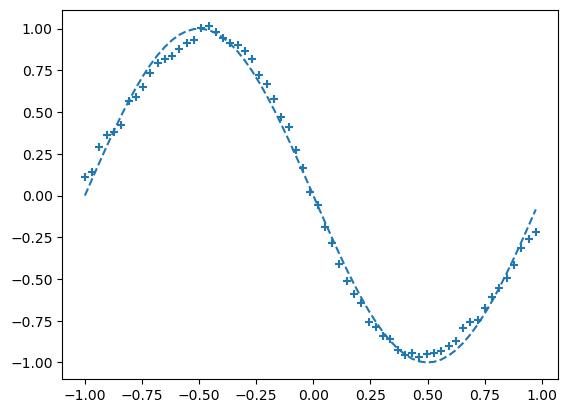

Epoch: 800/2001 Error: 0.001479214468898751


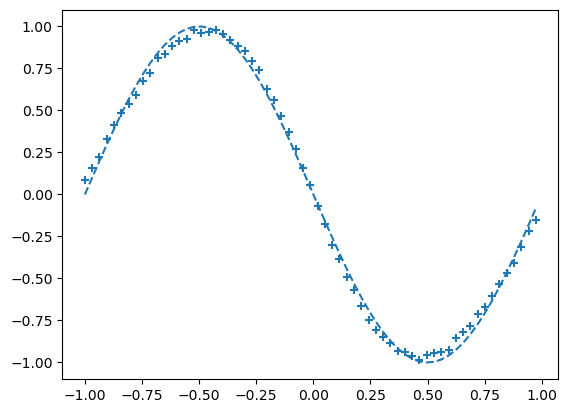

Epoch: 1000/2001 Error: 0.0008402245365568152


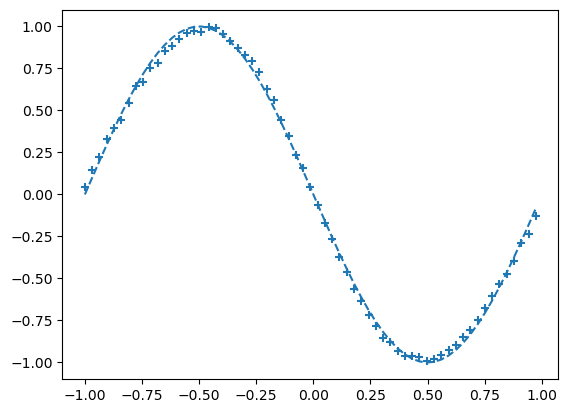

Epoch: 1200/2001 Error: 0.0003975930513759462


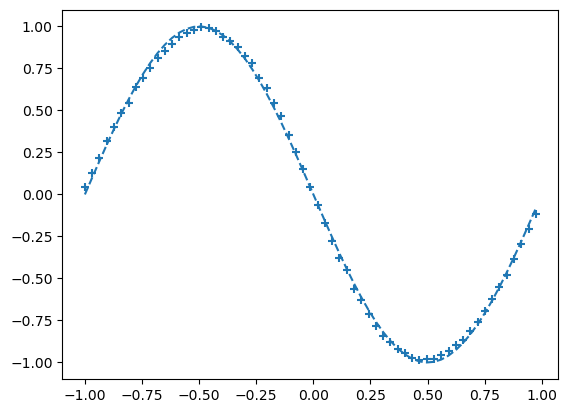

Epoch: 1400/2001 Error: 0.00022076440223507782


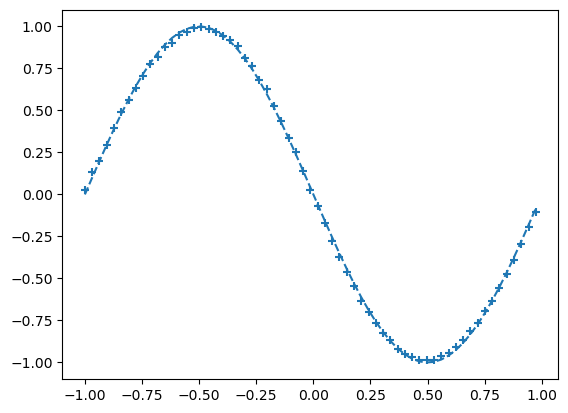

Epoch: 1600/2001 Error: 9.821233977677735e-05


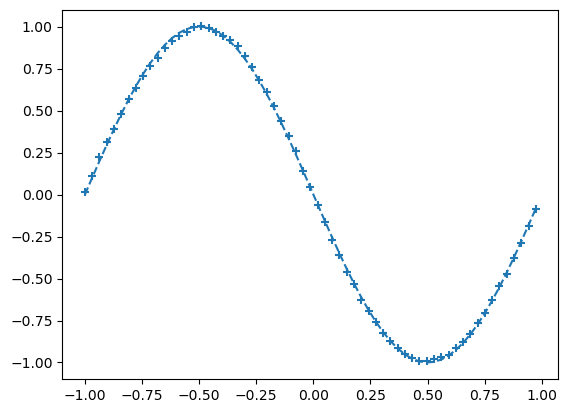

Epoch: 1800/2001 Error: 6.196914563026696e-05


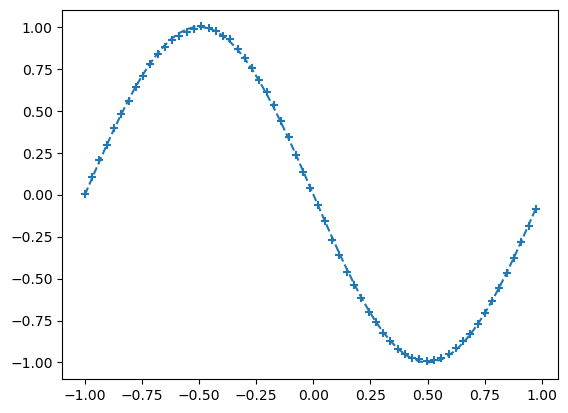

Epoch: 2000/2001 Error: 3.452905874716799e-05


In [8]:
# 학습 루트
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:  # shuffle로 인해 epoch마다 순서 다름
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)  # -1 : 몇 개인지 모르지만 알아서 계산해라
            total_error += 1.0/2.0 * np.sum(np.square(y-t))  # 오차제곱법
            
            plot_x.append(x)
            plot_y.append(y)
    
    if i % interval == 0 :
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch: ' + str(i) + '/' + str(epoch), 'Error: ' + str(total_error/n_data))